In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
X = df.loc[:, ['H', 'S', 'Q', 'D50', 'D84', 'R']].values
y = df.loc[:, ['qs']].values

# Scale the features and target variables
scaler1 = MinMaxScaler().fit(X)
X_scaled = scaler1.transform(X)
scaler2 = MinMaxScaler().fit(y)
y_scaled = scaler2.transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()

# Define the Gaussian Process kernel
kernel = RationalQuadratic()

# Create a Gaussian Process Regressor
gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.001, n_restarts_optimizer=10, random_state=0)

# Fit the model to the training data
gpr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gpr.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mae)


c:\Users\Mehdi\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


MSE: 0.0007871141452118156
RMSE: 0.02805555462313685
R-squared: 0.9403196676360821
Mean Absolute Error: 0.006994730535889615


c:\Users\Mehdi\anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter alpha is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


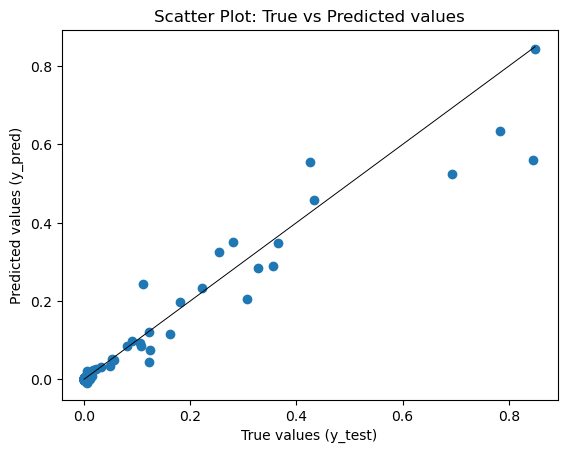

In [2]:
import matplotlib.pyplot as plt
# Scatter plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linewidth=0.7)
plt.xlabel('True values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Scatter Plot: True vs Predicted values')
plt.show()